<a href="https://colab.research.google.com/github/HimanshuSahoo/Himanshu_Python/blob/main/SLR_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1. Delivery_time -> Predict delivery time using sorting time 

In [1]:
# import dataset

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv("delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data1 = data.rename(columns={'Delivery Time' : 'DT', 'Sorting Time' : 'ST'}, inplace = False)
data1

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# correlation

In [6]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


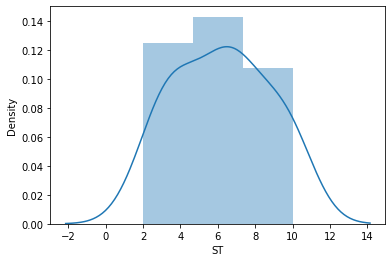

In [7]:
sns.distplot(data1['ST'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


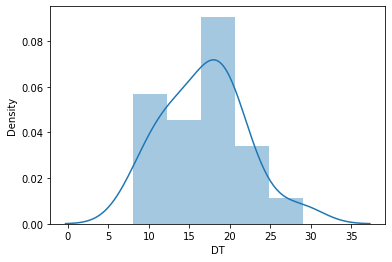

In [8]:
sns.distplot(data1['DT'])

In [9]:
# Fitting a linear regression model

In [10]:
import statsmodels.formula.api as smf
model = smf.ols("DT~ST",data = data1).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
help(smf.ols)

Help on method from_formula in module statsmodels.base.model:

from_formula(formula, data, subset=None, drop_cols=None, *args, **kwargs) method of builtins.type instance
    Create a Model from a formula and dataframe.
    
    Parameters
    ----------
    formula : str or generic Formula object
        The formula specifying the model
    data : array-like
        The data for the model. See Notes.
    subset : array-like
        An array-like object of booleans, integers, or index values that
        indicate the subset of df to use in the model. Assumes df is a
        `pandas.DataFrame`
    drop_cols : array-like
        Columns to drop from the design matrix.  Cannot be used to
        drop terms involving categoricals.
    args : extra arguments
        These are passed to the model
    kwargs : extra keyword arguments
        These are passed to the model with one exception. The
        ``eval_env`` keyword is passed to patsy. It can be either a
        :class:`patsy:patsy.Eval

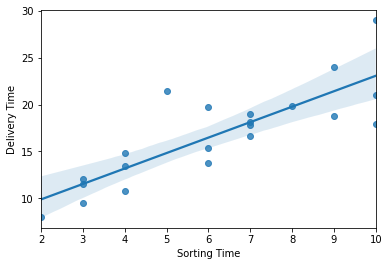

In [12]:
sns.regplot(x="Sorting Time", y="Delivery Time", data=data);

In [13]:
# coefficients

In [14]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [15]:
# t_Values

In [16]:
model.tvalues

Intercept    3.823349
ST           6.387447
dtype: float64

In [17]:
# p_Values

In [18]:
model.pvalues

Intercept    0.001147
ST           0.000004
dtype: float64

In [19]:
# r_sqauared values

In [20]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [21]:
# predict for 3 and 7 Sorting Time

In [22]:
newdata = pd.Series([3,7])

In [23]:
data1_pred = pd.DataFrame(newdata,columns=['ST'])

In [24]:
model.predict(data1_pred)

0    11.529794
1    18.125873
dtype: float64